#### Question 1
Use a real-world dataset (i.e. relational, text, image, video, voice files), prepare the dataset for modelling, consider one categorical variable in the dataset, and apply the classification task. To do so:  

* Provide the functional form of the predictive model for each algorithm.
* Train each model using different ratios of the trainset and visualize the performance of models using accuracy (y -axis) in terms of different ratio of trainsets (x-axis). Elaborate on the insights.
* Apply ensemble methods (bagging, boosting, stacking) on the base models, evaluate the performance of each ensemble technique in 100 Monte Carlo runs and visualize the performance of models using Boxplot.
* Select the best classifier and elaborate on its advantages and limitations.

Data Set Information : 

* URL : https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

#### Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, StackingClassifier
import warnings

In [2]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### Options
SVC, GNB, Dicesiontree

In [3]:
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [4]:
len(df.columns), len(df)

(14, 303)

In [5]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
X = df.drop("output", axis=1)
y = df["output"]

In [7]:
y.value_counts()

1    165
0    138
Name: output, dtype: int64

In [8]:
clfs = {
    "RF" : RandomForestClassifier(),
    "DT" : DecisionTreeClassifier(),
    "SVC" : SVC()
}

In [9]:
clf_acc_r1 = {}
clf_store_r1 = {}
clf_y_test_r1 = {}
clf_y_preds_r1 = {}
for key in clfs:
        for i in range(100):
                clf = clfs[key]
                X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.2)
                dt = clf.fit(X_train,y_train)
                y_preds = clf.predict(X_test) 
                actual = y_test
                predicted = y_preds
                accuracy = accuracy_score(actual, predicted)
        clf_acc_r1[key] = accuracy
        clf_store_r1[key] = dt
        clf_y_test_r1[key] = y_test
        clf_y_preds_r1[key] = y_preds

In [10]:
pd.DataFrame([clf_acc_r1])

,RF,DT,SVC
0,0.769547,0.670782,0.55144


In [11]:
clf_store_r1

{'RF': RandomForestClassifier(), 'DT': DecisionTreeClassifier(), 'SVC': SVC()}

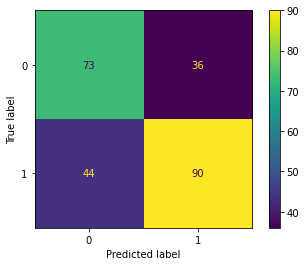

In [12]:
ConfusionMatrixDisplay.from_predictions(y_true = clf_y_test_r1["DT"], y_pred= clf_y_preds_r1["DT"]);

In [13]:
clf_acc_r2 = {}
clf_store_r2 = {}
clf_y_test_r2 = {}
clf_y_preds_r2 = {}
for key in clfs:
        for i in range(100):
                clf = clfs[key]
                X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.5)
                dt = clf.fit(X_train,y_train)
                y_preds = clf.predict(X_test) 
                actual = y_test
                predicted = y_preds
                accuracy = accuracy_score(actual, predicted)
        clf_acc_r2[key] = accuracy
        clf_store_r2[key] = dt
        clf_y_test_r2[key] = y_test
        clf_y_preds_r2[key] = y_preds

In [14]:
pd.DataFrame([clf_acc_r2])

,RF,DT,SVC
0,0.802632,0.743421,0.638158


In [15]:
clf_store_r2

{'RF': RandomForestClassifier(), 'DT': DecisionTreeClassifier(), 'SVC': SVC()}

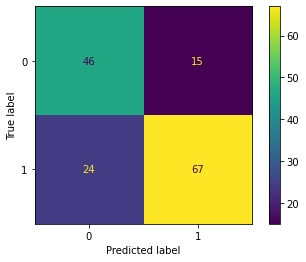

In [16]:
ConfusionMatrixDisplay.from_predictions(y_true = clf_y_test_r2["DT"], y_pred= clf_y_preds_r2["DT"]);

In [17]:
clf_acc_r3 = {}
clf_store_r3 = {}
clf_y_test_r3 = {}
clf_y_preds_r3 = {}
for key in clfs:
        for i in range(100):
                clf = clfs[key]
                X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.5)
                dt = BaggingClassifier(base_estimator = clf, n_estimators = i, max_samples = 0.8, max_features= 0.8)
                y_preds = clf.predict(X_test) 
                actual = y_test
                predicted = y_preds
                accuracy = accuracy_score(actual, predicted)
        clf_acc_r3[key] = accuracy
        clf_store_r3[key] = dt
        clf_y_test_r3[key] = y_test
        clf_y_preds_r3[key] = y_preds

In [18]:
pd.DataFrame([clf_acc_r3])

,RF,DT,SVC
0,0.888158,0.868421,0.638158


In [19]:
clf_acc_r4 = {}
clf_store_r4 = {}
clf_y_test_r4 = {}
clf_y_preds_r4 = {}
for key in clfs:
        for i in range(100):
                clf = clfs[key]
                X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.5)
                dt = AdaBoostClassifier(base_estimator = clf, n_estimators = i)
                y_preds = clf.predict(X_test) 
                actual = y_test
                predicted = y_preds
                accuracy = accuracy_score(actual, predicted)
        clf_acc_r4[key] = accuracy
        clf_store_r4[key] = dt
        clf_y_test_r4[key] = y_test
        clf_y_preds_r4[key] = y_preds

In [20]:
pd.DataFrame([clf_acc_r4])

,RF,DT,SVC
0,0.888158,0.861842,0.618421


In [21]:
def get_stacking():
        clf_l0 = {
                "DT" : DecisionTreeClassifier(),
                "SVC" : SVC()
        }
        level0 = clf_l0.items()
        level1 = RandomForestClassifier()
        model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5)
        return model

In [22]:
def get_classifiers():
    clf_stack = clfs
    clf_stack["stacking"] = get_stacking()
    return clf_stack


In [23]:
def evaluate_model(clf, X, y):
    cv=5
    scores = cross_val_score(clf, X, y, scoring='accuracy', cv=cv)
    return scores

In [24]:
warnings.filterwarnings("ignore")
clfs_stack = get_classifiers()
for name, model in clfs_stack.items():
    scores = evaluate_model(model, X, y)
    mean_val = np.mean(scores)
    std_div = np.std(scores)
    results = {
        "Name" : name,
        "Scores" : scores,
        "Mean" : mean_val, 
        "Std Deviation" : std_div 
    }
    print(results)

{'Name': 'RF', 'Scores': array([0.83606557, 0.8852459 , 0.78688525, 0.8       , 0.76666667]), 'Mean': 0.8149726775956283, 'Std Deviation': 0.04178466673783088}
{'Name': 'DT', 'Scores': array([0.73770492, 0.85245902, 0.75409836, 0.7       , 0.73333333]), 'Mean': 0.7555191256830602, 'Std Deviation': 0.051558296475363564}
{'Name': 'SVC', 'Scores': array([0.60655738, 0.60655738, 0.73770492, 0.68333333, 0.58333333]), 'Mean': 0.6434972677595628, 'Std Deviation': 0.05798414187936817}


TypeError: cannot pickle 'dict_items' object